In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Create a small list so we can index on training label so that they are human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Building a multiclass classification model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_1_non_normalised = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3764 - accuracy: 0.1004 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [7]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Normalizing the data to improve accuracy

In [8]:
# Normalizing our data
train_data_normalised = train_data / 255.0
test_data_normalised = test_data / 255.0

In [11]:
# Model with normalized data

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_2_normalised = model_2.fit(train_data_normalised, train_labels, epochs=10, validation_data=(test_data_normalised, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3598 - accuracy: 0.4371 - val_loss: 0.8086 - val_accuracy: 0.6937
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7100 - accuracy: 0.7495 - val_loss: 0.6930 - val_accuracy: 0.7558
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6377 - accuracy: 0.7793 - val_loss: 0.6530 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6057 - accuracy: 0.7921 - val_loss: 0.6207 - val_accuracy: 0.7874
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5793 - accuracy: 0.7980 - val_loss: 0.6019 - val_accuracy: 0.7912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5635 - accuracy: 0.8041 - val_loss: 0.6082 - val_accuracy: 0.7933
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5536 - accuracy: 0.8066 - val_loss: 0.5783 - val_accuracy:

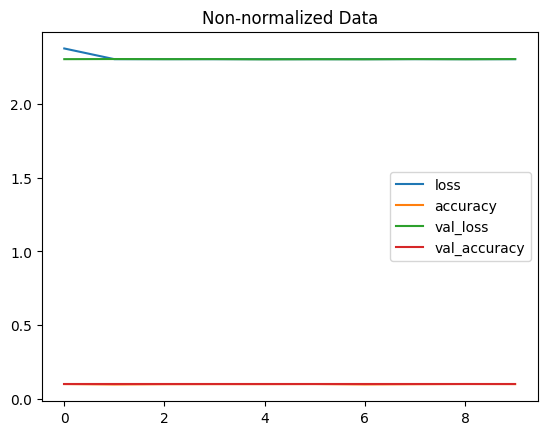

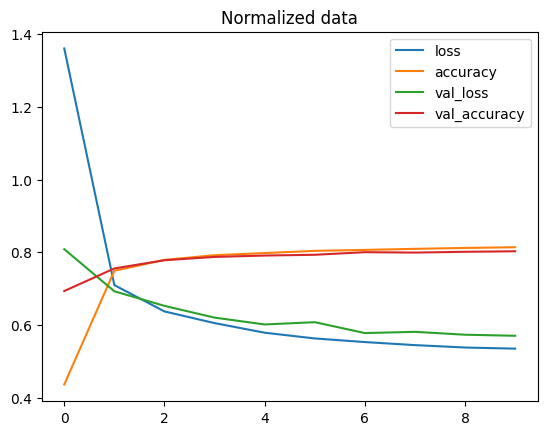

In [12]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_1_non_normalised.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(history_2_normalised.history).plot(title="Normalized data");

## Finding the ideal learning rate

In [13]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**( epoch/20))

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data_normalised, train_labels, epochs=40, validation_data=(test_data_normalised, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 14s 6ms/step - loss: 1.6014 - accuracy: 0.3270 - val_loss: 1.3612 - val_accuracy: 0.4592 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2269 - accuracy: 0.5169 - val_loss: 1.1207 - val_accuracy: 0.5608 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9191 - accuracy: 0.6689 - val_loss: 0.8119 - val_accuracy: 0.7028 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7606 - accuracy: 0.7146 - val_loss: 0.7449 - val_accuracy: 0.7148 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7168 - accuracy: 0.7254 - val_loss: 0.7239 - val_accuracy: 0.7235 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6971 - accuracy: 0.7308 - val_loss: 0.7303 - val_accuracy: 0.7158 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 1

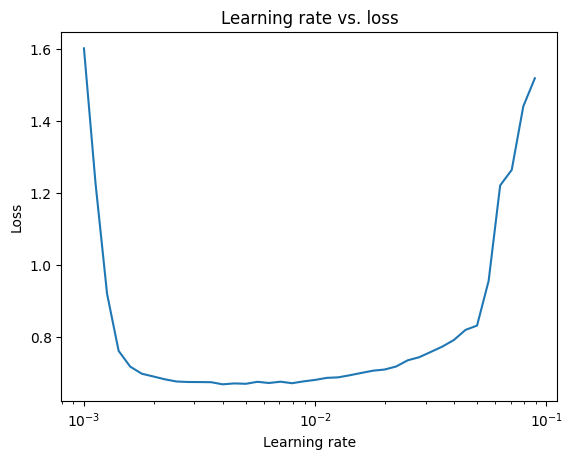

In [14]:
# Plot the learning rate decay curve
import matplotlib.pyplot as plt
lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [15]:
# Refit model with ideal learning rate

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data_normalised, train_labels, epochs=20, validation_data=(test_data_normalised, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2495 - accuracy: 0.4869 - val_loss: 0.9519 - val_accuracy: 0.6243
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8603 - accuracy: 0.6417 - val_loss: 0.8458 - val_accuracy: 0.6494
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8032 - accuracy: 0.6659 - val_loss: 0.8032 - val_accuracy: 0.6739
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6975 - accuracy: 0.7413 - val_loss: 0.6796 - val_accuracy: 0.7536
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6430 - accuracy: 0.7676 - val_loss: 0.6560 - val_accuracy: 0.7796
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5965 - accuracy: 0.7952 - val_loss: 0.6198 - val_accuracy: 0.7902
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5762 - accuracy: 0.8024 - val_loss: 0.6101 - val_accuracy:

## Evaluating the model

In [21]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [18]:
y_prob = model_4.predict(test_data_normalised)

313/313 [==============================] - 0s 1ms/step


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_prob.argmax(axis=1))

array([[825,   5,  41,  71,   2,   1,  46,   0,   9,   0],
       [  1, 944,  14,  34,   6,   0,   1,   0,   0,   0],
       [ 35,   8, 705,  13, 138,   1, 100,   0,   0,   0],
       [ 42,  38,  11, 828,  34,   1,  44,   0,   2,   0],
       [  1,   8, 119,  26, 759,   0,  83,   0,   4,   0],
       [  1,   0,   0,  15,   0, 853,   0,  75,  14,  42],
       [261,   3, 134,  52, 145,   1, 393,   0,  11,   0],
       [  0,   0,   0,   0,   0,  32,   0, 943,   0,  25],
       [ 10,   1,   2,  10,  17,  27,  53,   6, 874,   0],
       [  0,   0,   0,   4,   0,  24,   1,  65,   0, 906]])

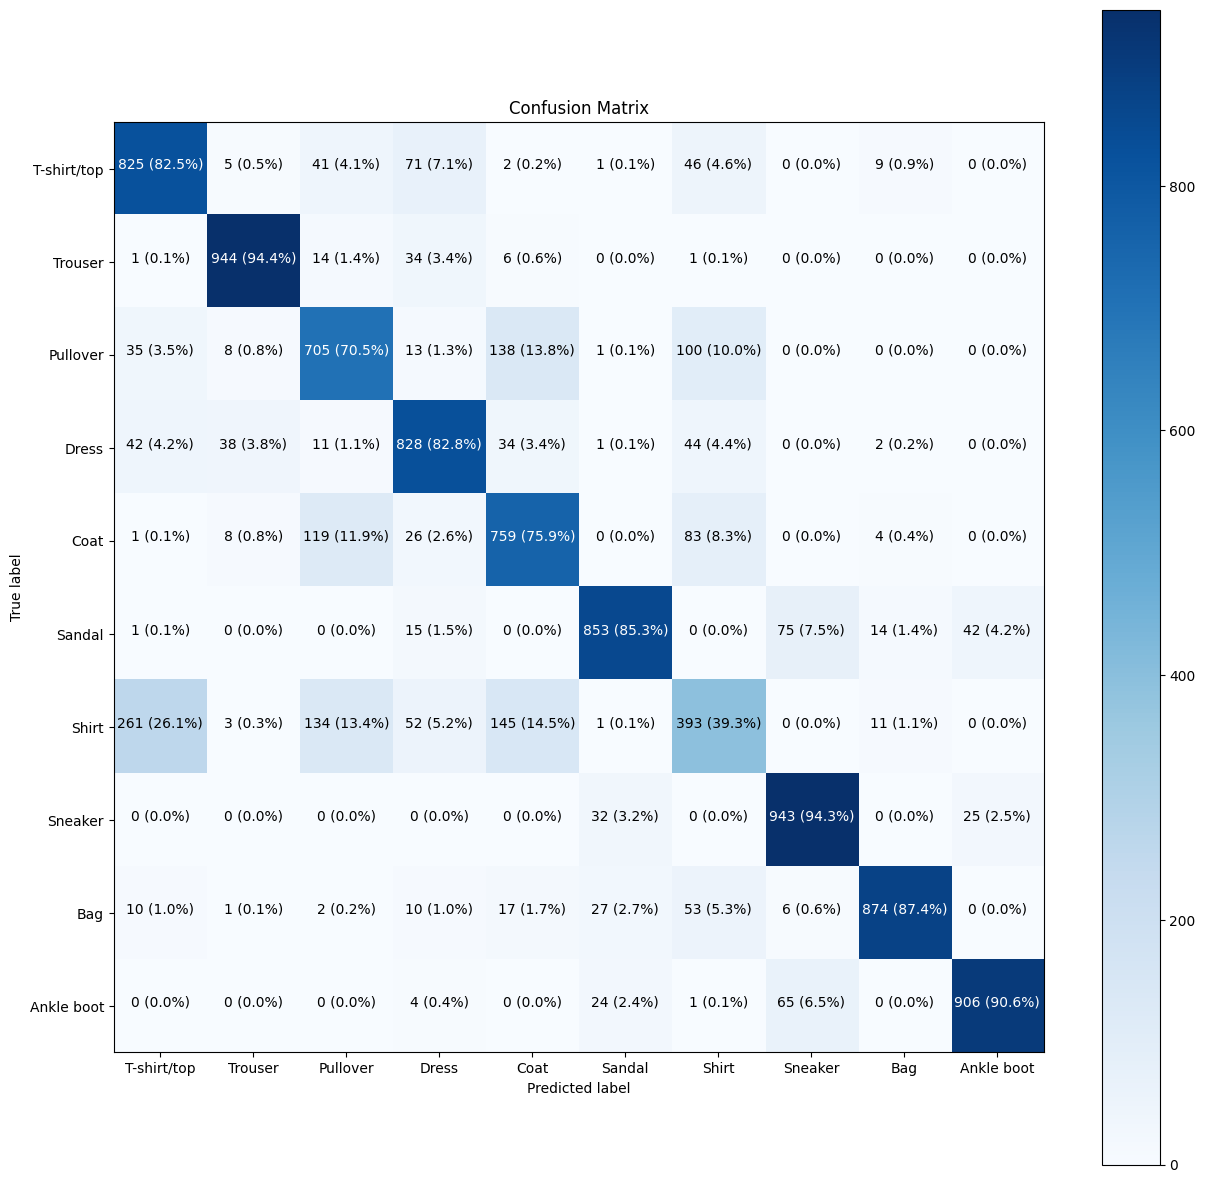

In [22]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_prob.argmax(axis=1),
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [23]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 143ms/step


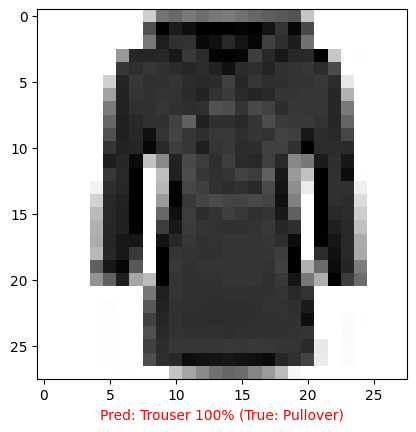

In [24]:
plot_random_image(model=model_4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)